In [2]:
import tensorflow as tf
from tensorflow import keras
import os,datetime

In [4]:
mnist=tf.keras.datasets.mnist

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
print("shape is :",x_train[0].shape)

shape is : (28, 28)


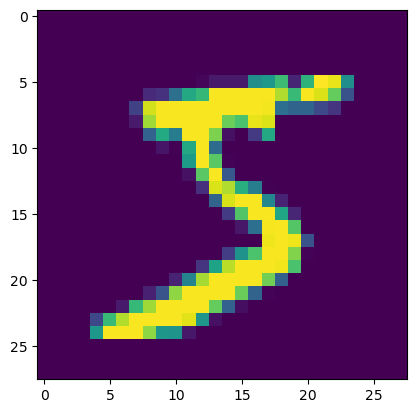

first digit in y_train is : 5


In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print("first digit in y_train is :",y_train[0])

In [11]:
x_train,x_test=x_train/255.0,x_test/255.0

In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
logdir=os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [19]:
checkpoint_path="training_2/cp={epoch:04d}.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_acc',verbose=1,save_weights_only=True,save_freq='epoch')

In [22]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test),callbacks=[tensorboard_callback,checkpoint_callback])
loss,acc=model.evaluate(x_test,y_test,verbose=1)
print('Original model,accuracy:{:5.2F}%'.format(100*acc))

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9350
Epoch 1: saving model to training_2\cp=0001.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2179 - accuracy: 0.9351 - val_loss: 0.1034 - val_accuracy: 0.9681
Epoch 2/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.0979 - accuracy: 0.9695
Epoch 2: saving model to training_2\cp=0002.ckpt
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0980 - accuracy: 0.9694 - val_loss: 0.0808 - val_accuracy: 0.9740
Epoch 3/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9782
Epoch 3: saving model to training_2\cp=0003.ckpt
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0733 - val_accuracy: 0.9762
Epoch 4/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy: 0.9832
Epoch 4: saving model to training_2\cp=0004.ckpt
1875/1875 [===

In [23]:
model.save('MyModel',save_format='tf')

INFO:tensorflow:Assets written to: MyModel\assets


INFO:tensorflow:Assets written to: MyModel\assets


In [24]:
loaded_model=tf.keras.models.load_model('MyModel')
loaded_loss,loaded_acc=loaded_model.evaluate(x_test,y_test,verbose=1)
print("model accuracy:{:5.2f}%".format(100*loaded_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9803
model accuracy:98.03%


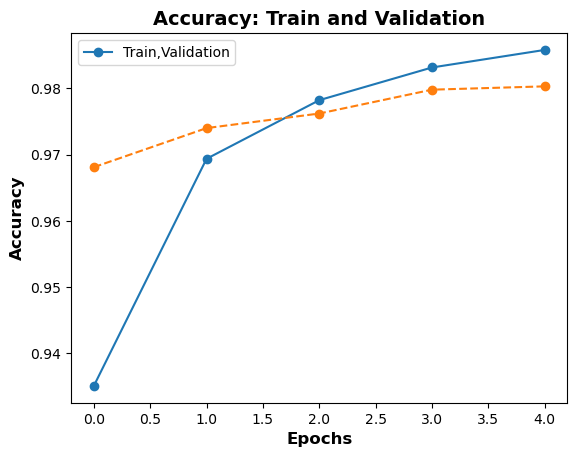

In [25]:
plt.plot(history.history['accuracy'],'-o')
plt.plot(history.history['val_accuracy'],'--o')
plt.title("Accuracy: Train and Validation",fontsize=14,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.legend(["Train,Validation"],loc="upper left")
plt.show()